# <center> Paper figures </center>

In [1]:
import sys
sys.path.append("../")
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from Linearity import Neuron
from IPython.display import set_matplotlib_formats
import scipy.stats as ss
set_matplotlib_formats('pdf', 'png')
print plt.style.available
plt.style.use('seaborn-notebook')
# load libraries and set plot parameters
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 8, 8
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-bright', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [2]:
#fileList = glob.glob("/media/sahil/NCBS_Shares_BGStim/patch_data/**/c?/plots/*.pkl")
neuronList = []
with open("/media/sahil/NCBS_Shares_BGStim/patch_data/CPP_files.txt", 'r') as fp:
    fileList = fp.read().splitlines()
    for i,filename in enumerate(fileList):
        fileList[i] += "plots/" + filename.split('/')[-2] + ".pkl"
        try:
            print "Reading ", fileList[i]
            neuronList.append(Neuron.load(fileList[i]))
        except:
            print "Couldn't read", fileList[i]
print "Read {} files.".format(len(fileList))

Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150828/c2/plots/c2.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150902/c1/plots/c1.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150902/c2/plots/c2.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150904/c1/plots/c1.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150904/c3/plots/c3.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160126/c3/plots/c3.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160209/c4/plots/c4.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160219/c5/plots/c5.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160223/c2/plots/c2.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160223/c3/plots/c3.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160513/c5/plots/c5.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160617/c5/plots/c5.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160817/c2/plots/c2.pkl
Reading  /media/sahil/NCB

### Figure 1

In [3]:
def figure1(feature = 0):
    ''' Plotting to show sublinearity of CA3 inputs at CA1. '''
    ratio = []
    numNeurons = 0
    numBins = 500
    for neuron in neuronList:
        for experiment in neuron.experiment:
            if experiment == "Control":            
                numNeurons+=1
                for numSq in neuron.experiment[experiment]:
                    #if 5 in neuron.experiment[experiment]:
                    coords = neuron.experiment[experiment][numSq].coordwise
                    for coord in coords:
                        try:
                            if feature in coords[coord].average_feature and coords[coord].expected_feature:
                                if not np.isnan(coords[coord].average_feature[feature]/coords[coord].expected_feature[feature]) and not np.isinf(coords[coord].average_feature[feature]/coords[coord].expected_feature[feature]):
                                    ratio.append(coords[coord].average_feature[feature]/coords[coord].expected_feature[feature])
                        except:
                            print "Couldn't append to ratio, perhaps feature not found"
    ratio = np.array(ratio)
    gt_one = ratio[np.where(ratio>1)]
    frac_gt_one = round(float(len(gt_one))/len(ratio)*1e2,2)
    #print [x for x in ratio]
    plt.hist(ratio, bins=numBins)
    plt.title("Sublinearity of input summation")
    plt.axvline(1.0, linestyle='dashed', linewidth=2)
    plt.xlabel("O/E")
    plt.ylabel("Frequency")
    plt.annotate("{} \%".format(frac_gt_one), xy=(1, 100), xytext=(1.5, 100), textcoords='data', arrowprops=dict(connectionstyle="arc3", arrowstyle = "<-"))
    plt.show()

    print "Legend text: Number of cells: {}, number of points: {}, fraction of points greater than one: {}".format(numNeurons, len(ratio), frac_gt_one )

## Figure 2

In [4]:
def figure2(feature = 0):
    ''' Get's the fraction of times an AP occurs verus PSPs '''
    numNeurons = 0
    numAP = 0
    numPSP = 0
    for neuron in neuronList:
        for experiment in neuron.experiment:
            if experiment == "Control":    
                numNeurons+=1
                for squares in neuron.experiment[experiment]:
                    nSq = neuron.experiment[experiment][squares].trial
                    for trialnum in nSq:
                        if nSq[trialnum].AP_flag:
                            numAP+=1
                        else:
                            numPSP+=1
    
    fracAPs = float(numAP)/numPSP
    fig, ax = plt.subplots()
    index = np.arange(2)
    width = 0.5
    ax.bar(index, (numPSP, numAP), width)
    ax.set_title("CA1 responses")
    ax.set_ylabel("Frequency")
    ax.set_xticks(index)
    ax.set_xticklabels(('PSP', 'AP'))
    plt.show()
    print "Legend text: Number of cells: {}, number of points: {}, fraction of APS: {}".format(numNeurons, numAP+numPSP, fracAPs)

## Figure 3

In [5]:
def figure3(feature=0):
    ''' Looking at the variability in PSPs for a given square'''
    numNeurons = 0
    coeff_var = []
    var = []
    mean = []
    squareNum = []
    for neuron in neuronList:
        for experiment in neuron.experiment:
            if experiment == "Control":            
                numNeurons+=1
                for numSq in neuron.experiment[experiment]:
                    coordwise = neuron.experiment[experiment][numSq].coordwise
                    for coord in coordwise:
                        try:
                            if len(coordwise[coord].trials) > 2:
                                var.append(np.var([trial.feature[feature]*1e3 for trial in coordwise[coord].trials]))
                                mean.append(coordwise[coord].average_feature[feature]*1e3)
                                coeff_var.append(np.std([trial.feature[feature]*1e3 for trial in coordwise[coord].trials])/(coordwise[coord].average_feature[feature]*1e3))
                                squareNum.append(numSq)
                        except:
                            print "Cannot find variance."
    coeff_var = np.array(coeff_var)
    var = np.array(var)
    mean = np.array(mean)
    
    withZeros = len(coeff_var)
    coeff_var = coeff_var[np.nonzero(coeff_var)]
    withoutZeros = len(coeff_var)
    
    plt.hist(coeff_var, bins=40)
    plt.title("Coefficient of variation")
    plt.xlabel("$\sigma/\mu$")
    plt.ylabel("Frequency")
    plt.show()
    
    r_p = 0.2 # Release probability
    plt.scatter(mean, var, c=squareNum, cmap='plasma')
    mean_axis = np.linspace(np.min(mean), np.max(mean),100)
    var_estimate = mean_axis*(1-r_p)
    plt.plot(mean_axis,var_estimate, '--')
    plt.title("Spread of the PSPs")
    plt.xlabel("$\mu$")
    plt.ylabel("$\sigma^2$")
    plt.colorbar()
    plt.show()
    print "Legend text: Number of cells: {}, number of points: {}".format(numNeurons, len(coeff_var) )

## Figure 1: CA1 almost always sums sublinearly to random inputs ( 1 vs. 5 )

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in double_scalars


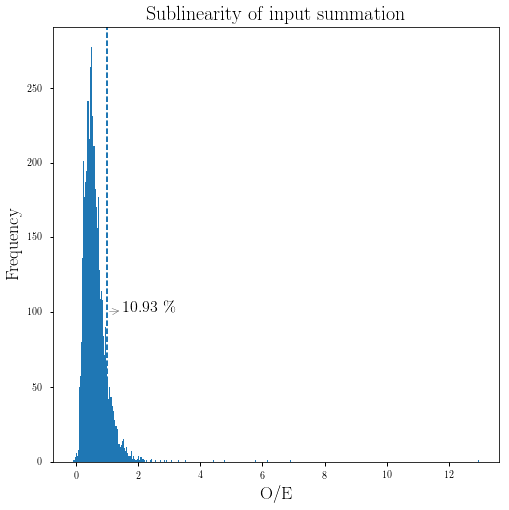

Legend text: Number of cells: 53, number of points: 6175, fraction of points greater than one: 10.93


In [6]:
figure1()

## Figure 2: CA1 responses are mostly subthreshold

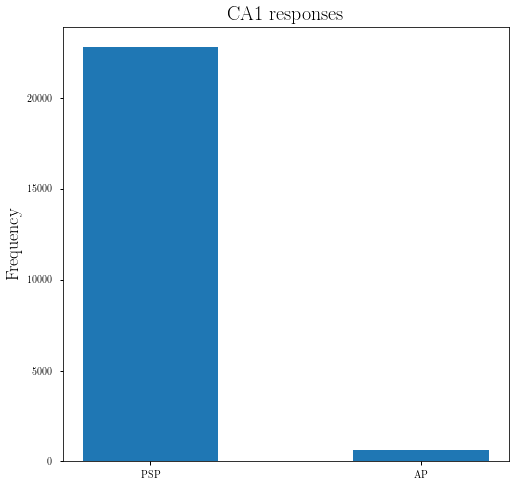

Legend text: Number of cells: 53, number of points: 23426, fraction of APS: 0.0279069767442


In [7]:
figure2()

## Figure 3: CA1 responses don't vary a lot (or as predicted by release probs?)

In [ ]:
figure3() # Need to correct for variance (sample var, population variance)

In [69]:
def figure5(feature=0, square=1):
    ''' Looking at the one square distribution for GABAzine and Control'''
    numNeurons = 0
    control_vmax = []
    gabazine_vmax = []
    
    for neuron in neuronList:
        if len(neuron.experiment)>1:
            try:
                control_trials = neuron.experiment["Control"][square].trial
                gabazine_trials = neuron.experiment["GABAzine"][square].trial
                for trial in control_trials:
                    try:
                        control_vmax.append(control_trials[trial].feature[feature])
                    except:
                        print "trial didn't work", trial
                for trial in gabazine_trials:
                    try:
                        gabazine_vmax.append(gabazine_trials[trial].feature[feature])
                    except:
                        print "trial didn't work", trial
            except:
                print square, "square not found in either or both"
    
    rangeMin = min(min(control_vmax), min(gabazine_vmax))
    rangeMax = max(max(control_vmax), max(gabazine_vmax))
    bins = np.linspace(rangeMin, rangeMax, 30)
    plt.hist(control_vmax, bins=bins, label="Control", alpha=0.2)
    plt.hist(gabazine_vmax, bins=bins, label="GABAzine", alpha=0.2)
    plt.title("Comparing one square distributions for Control and GABAzine")
    plt.xlabel("$V_{max}$")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

trial didn't work 5
trial didn't work 7
trial didn't work 9
trial didn't work 13
trial didn't work 31
trial didn't work 35
trial didn't work 37
trial didn't work 53
trial didn't work 59
trial didn't work 61
trial didn't work 85
trial didn't work 7
trial didn't work 13
trial didn't work 31
trial didn't work 37
trial didn't work 55
trial didn't work 59
trial didn't work 61
trial didn't work 37
trial didn't work 9
trial didn't work 13
trial didn't work 14
trial didn't work 24
trial didn't work 33
trial didn't work 34
trial didn't work 37
trial didn't work 40
trial didn't work 48
trial didn't work 52
trial didn't work 55
trial didn't work 57
trial didn't work 61
trial didn't work 64
trial didn't work 72
trial didn't work 57
trial didn't work 28
trial didn't work 52
trial didn't work 26
trial didn't work 45
trial didn't work 55
trial didn't work 63
trial didn't work 106


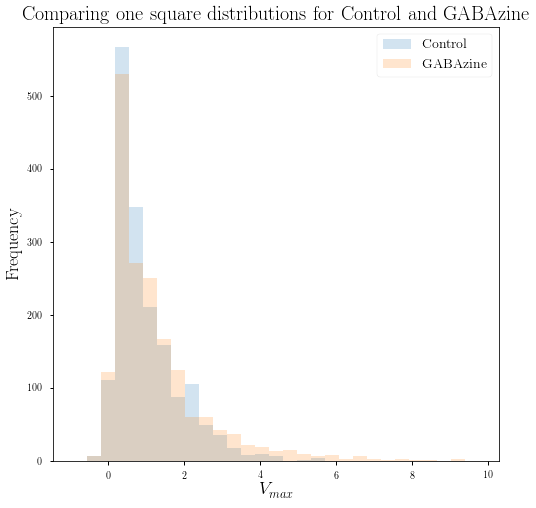

trial didn't work 1
trial didn't work 5
trial didn't work 7
trial didn't work 10
trial didn't work 12
trial didn't work 14
trial didn't work 17
trial didn't work 19
trial didn't work 23
trial didn't work 24
trial didn't work 25
trial didn't work 27
trial didn't work 29
trial didn't work 32
trial didn't work 34
trial didn't work 37
trial didn't work 38
trial didn't work 39
trial didn't work 40
trial didn't work 41
trial didn't work 43
trial didn't work 45
trial didn't work 46
trial didn't work 48
trial didn't work 50
trial didn't work 51
trial didn't work 54
trial didn't work 55
trial didn't work 56
trial didn't work 57
trial didn't work 58
trial didn't work 62
trial didn't work 63
trial didn't work 64
trial didn't work 66
trial didn't work 67
trial didn't work 72
trial didn't work 1
trial didn't work 2
trial didn't work 3
trial didn't work 5
trial didn't work 6
trial didn't work 7
trial didn't work 8
trial didn't work 9
trial didn't work 10
trial didn't work 12
trial didn't work 13
tri

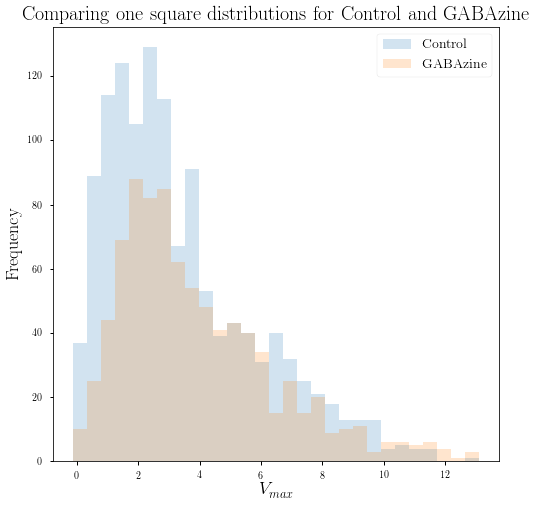

In [70]:
figure5(square=1)
figure5(square=5)

In [58]:
def figure6(feature=0):
    ''' Looking at the one square distribution for GABAzine and Control coordwise'''
    numNeurons = 0
    control_vmax_1 = []
    gabazine_vmax_1 = []
    control_vmax_2 = []
    gabazine_vmax_2 = []
    
    for neuron in neuronList:
        if len(neuron.experiment)>1:
            control_coords = neuron.experiment["Control"][1].coordwise
            gabazine_coords = neuron.experiment["GABAzine"][1].coordwise
            for coord in list(set(control_coords) & set(gabazine_coords)):
                try:
                    if control_coords[coord].average_feature[feature] and gabazine_coords[coord].average_feature[feature]:
                        control_vmax_1.append(control_coords[coord].average_feature[feature])
                        gabazine_vmax_1.append(gabazine_coords[coord].average_feature[feature])
                except:
                    print "coord didn't work", coord
            
            # Same thing for other squares
            #print neuron.experiment["Control"]
            #control_trials = neuron.experiment["Control"][5].trial
            #gabazine_trials = neuron.experiment["GABAzine"][5].trial
            #for trial in control_trials:
            #    try:
            #        control_vmax_2.append(control_trials[trial].feature[feature])
            #    except:
            #        print "trial didn't work", trial
            #for trial in gabazine_trials:
            #    try:
            #        gabazine_vmax_2.append(gabazine_trials[trial].feature[feature])
            #    except:
            #        print "trial didn't work", trial
    
    control_vmax_1, gabazine_vmax_1 = np.array(control_vmax_1), np.array(gabazine_vmax_1)
    idx = np.argsort(gabazine_vmax_1)
    print "Control v_max is larger for {} points".format(len(np.where(control_vmax_1>2)[0]))
    control_vmax_1, gabazine_vmax_1 = control_vmax_1[idx], gabazine_vmax_1[idx]
    print len(control_vmax_1)
    # Picking a fraction
    
    p = np.poly1d(np.polyfit(range(len(control_vmax_1)), control_vmax_1, 2))
                  
    maxVmax = 2.0
    #print np.where(gabazine_vmax_1>maxVmax)[0][0]
    maxVmax_index = np.where(gabazine_vmax_1>maxVmax)[0][0]
    
    plt.plot(control_vmax_1,'.', label="Control")
    plt.plot(gabazine_vmax_1,'.', label="GABAzine")
    plt.hlines(maxVmax, 0, len(control_vmax_1),linestyles='--')
    plt.plot(range(len(control_vmax_1)), p(range(len(control_vmax_1))), label="polynomial fit")
    plt.legend()
    plt.show()
    

    #maxVmax_index = 652
    print maxVmax_index
    alpha = 1.0
    control_vmax_1, gabazine_vmax_1 = control_vmax_1[:maxVmax_index], gabazine_vmax_1[:maxVmax_index]
    
    print len(control_vmax_1)
    
    bins = np.linspace(-0.5, 10.0, 42)
    plt.hist(control_vmax_1, bins=bins, label="Control", alpha=alpha, cumulative=True, histtype='step')
    plt.hist(gabazine_vmax_1, bins=bins, label="GABAzine", alpha=alpha, cumulative=True, histtype='step')
    plt.title("Comparing one square distributions for Control and GABAzine")
    plt.xlabel("$V_{max}$")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    
    plt.hist(control_vmax_1/gabazine_vmax_1, bins=bins, label="Control/GABAzine", alpha=0.2)
    plt.vlines(1, 0,130)
    plt.title("Control/GABAzine")
    plt.xlabel("$V_{max}$")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    
    slope, intercept, r_value, p_value, std_err = ss.linregress(control_vmax_1, gabazine_vmax_1)
    control_range = np.linspace(np.min(control_vmax_1), np.max(control_vmax_1), 100)
    plt.scatter(control_vmax_1, gabazine_vmax_1, c=np.log(control_vmax_1/gabazine_vmax_1))
    plt.plot(control_range, control_range*slope + intercept, label="${:.1f}*x + {:.1f}, r^2= {:0.2f} $".format(slope, intercept, r_value))
    plt.xlim((-0.5,9))
    plt.ylim((-0.5,9))
    plt.xlabel("Control")
    plt.ylabel("GABAzine")
    plt.colorbar()
    plt.legend()
    plt.show()
    
    print ss.ttest_rel(control_vmax_1, gabazine_vmax_1)
    
    d,pval = ss.ks_2samp(control_vmax_1, gabazine_vmax_1)
    print d, pval

coord didn't work frozenset([(7, 5)])
coord didn't work frozenset([(7, 11)])
coord didn't work frozenset([(7, 5)])
coord didn't work frozenset([(3, 7)])
coord didn't work frozenset([(7, 7)])
coord didn't work frozenset([(7, 5)])
Control v_max is larger for 71 points
651


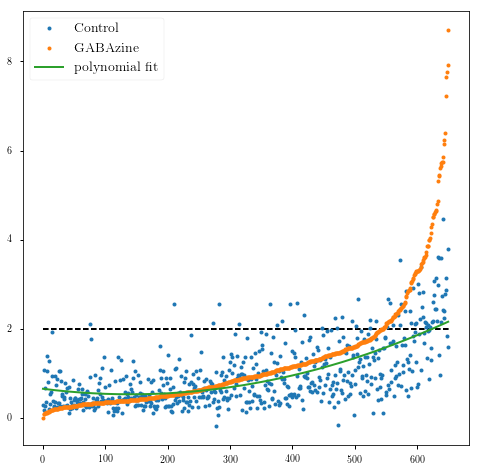

547
547


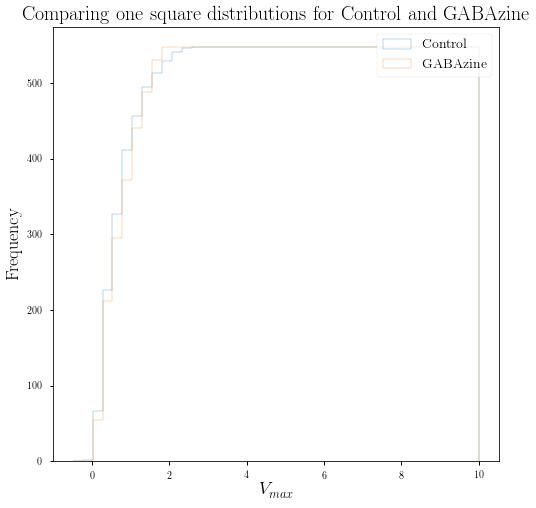

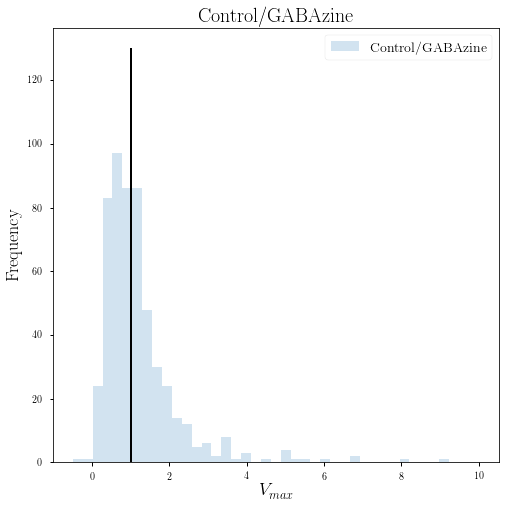

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:83: RuntimeWarning: invalid value encountered in log


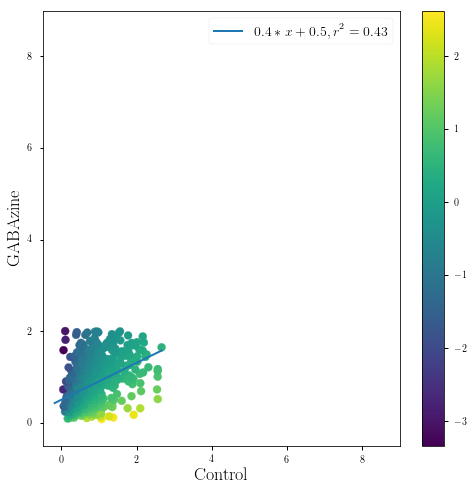

Ttest_relResult(statistic=-1.5462280623853308, pvalue=0.1226288854521647)
0.091407678245 0.0193027392662


In [59]:
figure6()

## Testing

In [41]:
from sklearn.metrics import mutual_info_score

def calc_MI(x, y, bins=50): # Just to start with.
    c_xy = np.histogram2d(x, y)[0] # , bins
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

def figure4():
    ''' Mutual information between the time to spike and expected excitation '''
    mut_OE = []
    mut_TE = []
    ratio = []
    numNeurons = 0
    for neuron in neuronList:
        expected = []
        observed = []
        time_peak = []
        for experiment in neuron.experiment:
            if experiment == "Control":            
                for numSq in neuron.experiment[experiment]:
                    if numSq>1:
                        numNeurons+=1
                        coordwise = neuron.experiment[experiment][numSq].coordwise
                        for coord in coordwise:
                            for trial in coordwise[coord].trials:
                                try:
                                    if len(coordwise[coord].trials)>1:
                                            expected.append(coordwise[coord].expected_feature[0])
                                            observed.append(trial.feature[0])
                                            time_peak.append(trial.feature[3])
                                    else:
                                        print len(coordwise[coord].trials)
                                except:
                                    pass
        if len(observed) and len(expected) and len(time_peak):
            mut_OE.append(calc_MI(observed, expected))
            mut_TE.append(calc_MI(time_peak, expected))
            ratio.append(mut_OE[-1]/mut_TE[-1])
            print ratio[-1]
    #plt.hist(mut_OE)
    #plt.hist(mut_TE)
    plt.hist(ratio)
    plt.show()

In [60]:
figure4()

NameError: name 'figure4' is not defined

In [137]:
a = [1,2,3,4]

In [141]:
a[:len(a)]

[1, 2, 3, 4]

In [28]:
len(control_vmax_1)

NameError: name 'control_vmax_1' is not defined

In [31]:
547/651.

0.8402457757296466